# Project: Cancer Subtype Multi-class Classification in Gene Expression Data

In [4]:
#Importing necessary data packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import os
import matplotlib.gridspec as gridspec # subplots
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

In [5]:
# load the features dataset
data = pd.read_csv("C:/Users/Sahana Deepak/Documents/Project - Cancer Subtype Multi-Class Classification in Gene Expression Data/Data/TCGA-PANCAN-HiSeq-801x20531/data.csv",header = 0)

In [6]:
# load the lables data
labels = pd.read_csv("C:/Users/Sahana Deepak/Documents/Project - Cancer Subtype Multi-Class Classification in Gene Expression Data/Data/TCGA-PANCAN-HiSeq-801x20531/labels.csv",header = 0)

In [7]:
# check the features data
data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [8]:
# check the labels data
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [9]:
#Checking the data type
data.info()
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    object
 1   Class       801 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [10]:
#Checking for null values
data.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64

In [11]:
labels.isnull().sum()

Unnamed: 0    0
Class         0
dtype: int64

In [12]:
#### Note: no missing values present

# Performing Exploratory Data Analysis (EDA)

In [13]:
# Summary statistics for the "Class" column
labels['Class'].describe()

count      801
unique       5
top       BRCA
freq       300
Name: Class, dtype: object

C:\Users\Sahana Deepak\AppData\Local\Temp\ipykernel_29612\339273941.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


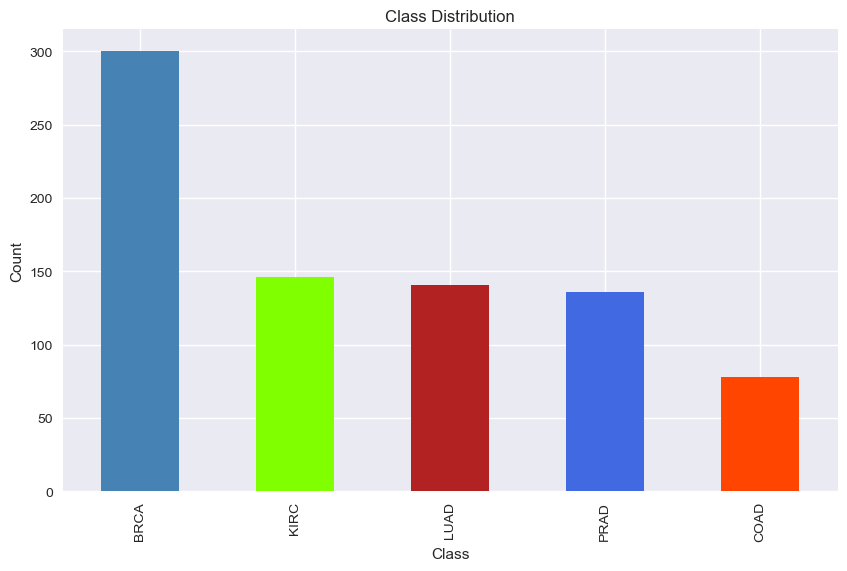

In [14]:
# Set the style to 'seaborn'
plt.style.use('seaborn')

# Set the font family to 'Arial'
plt.rc('font', family='Arial')

# Set the font size
plt.rc('font', size=14) 

# Count the number of unique classes and their frequencies
class_counts = labels['Class'].value_counts()
print(class_counts)

colors = ['steelblue', 'chartreuse', 'firebrick', 'royalblue', 'orangered']
# Plot a bar chart to visualize class distribution
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color= colors)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Save the figure
plt.savefig('label-counts.png', dpi=300, bbox_inches='tight')
plt.show()

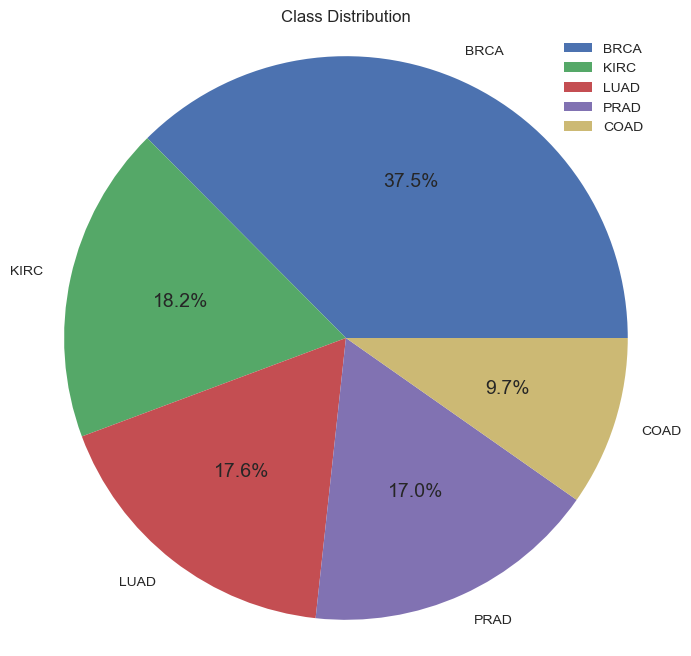

In [15]:

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')

# Display the chart with a legend
plt.legend(class_counts.index, loc='best')
plt.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.

# Save the figure
plt.savefig('Class-distribution-pie-plot.png', dpi=300, bbox_inches='tight')

plt.show()

The dataset distribution of samples across several classes is displayed in the data, where each class is denoted by a label. This is an examination of the data:

Class Distribution: - The samples in the dataset are categorized into five groups, denoted by the names COAD, PRAD, KIRC, LUAD, and BRCA.

With 300 instances, the class "BRCA" has the most samples, making it the most common class in the dataset. The remaining classes are COAD (78 samples), PRAD (136 samples), KIRC (146 samples), and LUAD (141 samples), in decreasing order of sample count.
Imbalance Dataset: - The dataset clearly displays class imbalance, with some classes having noticeably more samples than others. The effectiveness of machine learning models may be impacted by this.